In [54]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data = pd.read_excel(r'C:\Users\sarvesh.kesharwani\Pictures\DSC\Spam_Classifier\1. data_gathering\spam.xlsx')
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [55]:
data.shape

(5572, 5)

In [56]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
data.rename(columns={'v1': 'ham_or_spam', 'v2':'mail'}, inplace=True)
data.head(5)

,ham_or_spam,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['ham_or_spam'] = encoder.fit_transform(data['ham_or_spam'])
data.head(5)

,ham_or_spam,mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
data.isnull().sum()

ham_or_spam    0
mail           0
dtype: int64

In [60]:
data.duplicated().sum()

np.int64(403)

In [61]:
data = data.drop_duplicates(keep='first')

In [62]:
data.duplicated().sum()

np.int64(0)

In [63]:
data.shape

(5169, 2)

In [64]:
data['ham_or_spam'].value_counts()

ham_or_spam
0    4516
1     653
Name: count, dtype: int64

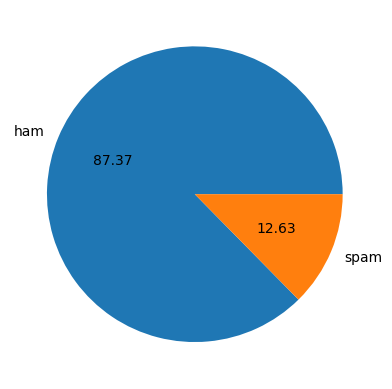

In [65]:
import matplotlib.pyplot as plt 
plt.pie(data['ham_or_spam'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [66]:
# data is imbalanced

In [67]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarvesh.kesharwani\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
data.sample(3)

,ham_or_spam,mail
4834,0,"OH RITE. WELL IM WITH MY BEST MATE PETE, WHO I..."
4679,0,"That's cool he'll be here all night, lemme kno..."
4821,1,u r a winner U ave been specially selected 2 r...


In [69]:
data['num_characters'] = data['mail'].astype(str).apply(len)
data.sample(3)

,ham_or_spam,mail,num_characters
5024,0,I was gonna ask you lol but i think its at 7,44
511,0,Prabha..i'm soryda..realy..frm heart i'm sory,45
4302,0,Yup i'm free...,15


In [70]:
data['mail'] = data['mail'].astype(str)

In [73]:
data['num_words'] = data['mail'].apply(lambda x: len(nltk.word_tokenize(str(x))))
data.sample(3)

,ham_or_spam,mail,num_characters,num_words
635,0,Me n him so funny...,20,6
3917,0,No need to ke qi... ÌÏ too bored izzit y sudde...,64,16
1810,0,"Now, whats your house # again ? And do you hav...",64,16


In [76]:
data['num_sentences'] = data['mail'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head(3)

,ham_or_spam,mail,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [78]:
data[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.980267,18.455794,1.965564
std,58.239404,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000
